**1)UNZIP THE FRUITS FOLDER**

In [1]:
# Mount Google drive then Run


!unzip -q '/content/drive/MyDrive/Fruit.zip' -d ata

**Explanation:**
The command `!unzip -q '/content/drive/MyDrive/Fruit.zip' -d ata` is used to
extract files from the `Fruit.zip` archive located in Google Drive.
The `-q` option suppresses the extraction output for a cleaner terminal display.
The files are extracted to a directory named `ata`.  




**2)Mount the Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Explanation**
- The code imports the `drive` module from `google.colab` and mounts Google Drive to the `/content/drive` directory.
- This allows access to Google Drive files within the Colab environment after user authorization.

**3)Install keras packages**

In [3]:
!pip install --upgrade --quiet keras-cv
!pip install --upgrade --quiet keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 43.7 MB/s eta 0:00:00


**Explanation**
- **Keras**: An open-source deep learning framework in Python that provides a user-friendly API for building and training neural networks, facilitating fast experimentation with its simplicity and modularity.

- **`!pip install --upgrade --quiet keras-cv`**: This command installs or upgrades the `keras-cv` library, which extends Keras with additional tools and functionalities specifically designed for computer vision tasks, while suppressing verbose output.cv provides additional tools, layers, and functionalities to facilitate the development and deployment of computer vision models, such as image classification, object detection, and image segmentation.

- **`!pip install --upgrade --quiet keras`**: This command installs or upgrades the core `keras` library to its latest version, providing the foundational tools and API for deep learning, with the `--quiet` option minimizing installation messages.

**4)Importing necessary modules**

In [4]:
import os

os.environ["KERAS_BACKEND"] = "jax"

import keras
import keras_cv
import numpy as np
import tensorflow_datasets as tfds
import matplotlib

**Explanation**
- **`import os`**: Imports the `os` module for interacting with the operating system and manipulating environment variables.

- **`os.environ["KERAS_BACKEND"] = "jax"`**: Sets the Keras backend to JAX, enabling optimized performance for computations and automatic differentiation.
- In summary, this code configures Keras to leverage JAX for backend operations, aiming to improve computational efficiency and speed.
- keras: Provides the main deep learning API for building and training models.
- keras_cv: Extends Keras functionalities specifically for computer vision applications.
- numpy: Facilitates array manipulation and numerical operations, often used in data preprocessing and manipulation.
- tensorflow_datasets: Provides easy access to a variety of datasets, useful for training and testing machine learning models.
- matplotlib: Enables data visualization, essential for analyzing and presenting data and model results.

**5)Data Preprocessing**

In [5]:
# Data Set taken total 18 classes with index labelling, which includes bad, good, mixed had 6 types fruits (total 18)

import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
import os
import cv2

# Example path to your image directory
image_dir = '/content/ata/Processed Images_Fruits'

# List to store resized images and labels
resized_images = []
labels = []

# Target size for resizing
target_size = (128, 128) # Better to take (64,64) Because of Memory Constraints

# Mapping for labels
label_to_index = {}
index = 0

# Iterate through each quality category
for quality in ['Bad Quality_Fruits', 'Good Quality_Fruits', 'Mixed Qualit_Fruits']:
    fruit_list = os.listdir(os.path.join(image_dir, quality))
    for fruit in fruit_list:
        fruit_path = os.path.join(image_dir, quality, fruit)
        img_list = os.listdir(fruit_path)
        for img_name in img_list:
            img_path = os.path.join(fruit_path, img_name)

            # Load and resize image
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB (OpenCV loads images in BGR format)
            resized_img = cv2.resize(img, target_size)

            # Append resized image and label
            resized_images.append(resized_img)
            if quality == 'Mixed Qualit_Fruits':
                label = fruit.lower() + '_mixed'
            else:
                label = fruit.lower()

            # Add label to mapping if not already present
            if label not in label_to_index:
                label_to_index[label] = index
                index += 1

            labels.append(label)

# Convert lists to numpy arrays
Image_data_resized = np.array(resized_images)
labels = np.array(labels)

# Convert string labels to integer labels
y = np.array([label_to_index[label] for label in labels])

# Check the shape of the resized array and labels
print("Resized Image Data Shape:", Image_data_resized.shape)
print("Labels Shape:", y.shape)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Image_data_resized, y, test_size=0.2, random_state=42)

# Convert labels to categorical one-hot encoding
num_classes = len(label_to_index)
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0



Resized Image Data Shape: (19526, 128, 128, 3)
Labels Shape: (19526,)


**Explanation**
____________________
- **`numpy`**: For numerical operations and array manipulations.
- **`tensorflow`**: For machine learning model building and evaluation.
- **`tensorflow_hub`**: For using pre-trained models from TensorFlow Hub (not used in this snippet).
- **`train_test_split`**: For splitting the data into training and testing sets.
- **`os`**: For interacting with the file system.
- **`cv2`**: OpenCV library for image processing.
_________________________________________________________________
- **`image_dir`**: Path to the directory containing the fruit images.
- **`resized_images`**: List to store images after resizing.
- **`labels`**: List to store corresponding labels for the images.
- **`target_size`**: Dimensions to which images will be resized.
- **`label_to_index`**: Dictionary mapping labels to integer indices.
- **`index`**: Counter for assigning indices to labels.
______________________________________________________________________
- **Loop through quality categories**: Iterates over directories for different fruit quality types.

- **List fruit directories**: Retrieves directories for specific fruit types within the current quality category.

- **Loop through fruit directories**: Iterates over each fruit type directory to process images.

- **Construct fruit path**: Defines the path to the current fruit directory.

- **List image files**: Retrieves filenames of images in the current fruit directory.

- **Loop through image files**: Iterates over each image file to process it.

- **Construct image path**: Defines the full path to the current image file.

- **Read image**: Loads the image into memory.

- **Convert image color format**: Converts the image from BGR to RGB color format.

- **Resize image**: Resizes the image to the specified dimensions.

- **Append resized image**: Adds the resized image to the list of images.

- **Assign label**: Sets the label for the image based on the quality category and fruit type.

- **Update label mapping**: Adds the label to a dictionary with a unique index if it’s not already present.

- **Append label**: Adds the label to the list of labels.
________________________________________________________________
- **Convert Lists to Arrays**: Converts the lists of images and labels to NumPy arrays.
- **Map Labels to Indices**: Converts string labels to numerical indices using the label_to_index dictionary.
________________________________________________________________
- **Split Data**:
  - **`X_train, X_test, y_train, y_test = train_test_split(Image_data_resized, y, test_size=0.2, random_state=42)`**
  - Splits the dataset into training (80%) and testing (20%) sets.
  - **`test_size=0.2`**: Specifies that 20% of the data should be used for testing.
  - **`random_state=42`**: Ensures reproducibility of the split by setting a fixed seed.

- **Number of Classes**:
  - **`num_classes = len(label_to_index)`**
  - Calculates the total number of unique classes based on the `label_to_index` dictionary.

- **One-Hot Encode Training Labels**:
  - **`y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)`**
  - Converts training labels to one-hot encoded vectors for multi-class classification.
  - **`num_classes=num_classes`**: Specifies the number of classes for one-hot encoding.

- **One-Hot Encode Testing Labels**:
  - **`y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)`**
  - Converts testing labels to one-hot encoded vectors in the same way as training labels.
  _____________________________________________________________
- **Convert Data Type and Normalize Training Images**:
  - **`X_train = X_train.astype('float32') / 255.0`**
  - **`X_train.astype('float32')`**: Converts the pixel values of training images to 32-bit floating-point numbers for numerical precision.
  - **`/ 255.0`**: Normalizes the pixel values to the range [0, 1] by dividing by 255 (the maximum pixel value). This scaling improves model performance and training stability by standardizing input data.

- **Convert Data Type and Normalize Testing Images**:
  - **`X_test = X_test.astype('float32') / 255.0`**
  - Same process as for training images: converts pixel values to 32-bit floats and normalizes them to the [0, 1] range for consistency in evaluation and comparison.
  _________________________________________________________

  This code prepares image data for training a machine learning model by resizing images, mapping labels to indices, splitting the dataset, and normalizing the image data.

**6)import keras and tensorflows**

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow_hub as hub
from keras.layers import TFSMLayer
from keras.models import Sequential
from keras.layers import Dropout, Dense
import os

**Explanation**


- **`import tensorflow as tf`**:
  - Imports TensorFlow, a library for machine learning and deep learning tasks.

- **`from tensorflow.keras.models import Sequential`**:
  - Imports the `Sequential` model class from TensorFlow's Keras API. This class allows for creating neural networks layer-by-layer in a straightforward, linear stack.

- **`from tensorflow.keras.layers import Dense, Dropout`**:
  - Imports `Dense` and `Dropout` layers from TensorFlow's Keras API.
    - **`Dense`**: Fully connected layer that outputs a linear transformation of the input.
    - **`Dropout`**: Regularization layer that randomly sets a fraction of input units to zero during training to prevent overfitting.

- **`import tensorflow_hub as hub`**:
  - Imports TensorFlow Hub, a library for reusable machine learning modules. It allows you to easily use pre-trained models or other components.

- **`from keras.layers import TFSMLayer`**:
  - Imports `TFSMLayer` from the Keras library. **Note**: `TFSMLayer` is not a standard Keras layer; it might be specific to a custom implementation or extension.

- **`from keras.models import Sequential`**:
  - Imports the `Sequential` model class from Keras (which is similar to TensorFlow’s `Sequential`). This class is used to build models in a linear stack.

- **`from keras.layers import Dropout, Dense`**:
  - Imports `Dropout` and `Dense` layers from Keras.
    - **`Dense`**: Fully connected layer for output.
    - **`Dropout`**: Regularization layer to reduce overfitting.

- **`import os`**:
  - Imports the OS module for interacting with the operating system, such as file and directory operations.

**7)Model.summmary()**

In [7]:
model = keras_cv.models.ImageClassifier.from_preset(
    "efficientnetv2_b0_imagenet",
    num_classes=num_classes,
)
model.summary()

100%|██████████| 1.79k/1.79k [00:00<00:00, 1.63MB/s]


100%|██████████| 23.1M/23.1M [00:01<00:00, 23.5MB/s]


Model: "image_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficient_net_v2b0_backbone          │ (None, None, None, 1280)    │       5,919,312 │
│ (EfficientNetV2Backbone)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ avg_pool (GlobalAveragePooling2D)    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictions (Dense)                  │ (None, 18)                  │          23,058 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,942,370 (22.67 MB)

 Trainable params: 5,881,762 (22.44 MB)

 Non-trainable params: 60,608 (236.75 KB)

**EXplanation**


- **`model = keras_cv.models.ImageClassifier.from_preset("efficientnetv2_b0_imagenet", num_classes=num_classes)`**:
  - **`keras_cv.models.ImageClassifier.from_preset`**: Creates an image classification model using a pre-trained model preset from Keras CV (Keras Computer Vision).
  - **`"efficientnetv2_b0_imagenet"`**: Specifies the pre-trained EfficientNetV2-B0 model, which has been trained on the ImageNet dataset.
  - **`num_classes=num_classes`**: Sets the number of output classes for the model based on your dataset. This adjusts the final layer to match your specific classification task.

- **`model.summary()`**:
  - Displays a summary of the model architecture, including the layers, output shapes, and number of parameters. This helps in understanding the structure of the model and verifying its configuration.

**8)train the model and save it**

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model s

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Save the entire model to a HDF5 file
model.save("my_model.h5")



Epoch 1/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 67s 101ms/step - accuracy: 0.9935 - loss: 0.0243 - val_accuracy: 0.9923 - val_loss: 0.0283
Epoch 2/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.9947 - loss: 0.0209 - val_accuracy: 0.9918 - val_loss: 0.0288
Epoch 3/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9935 - loss: 0.0301 - val_accuracy: 0.9898 - val_loss: 0.0495
Epoch 4/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9964 - loss: 0.0123 - val_accuracy: 0.9939 - val_loss: 0.0243
Epoch 5/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9919 - loss: 0.0281 - val_accuracy: 0.9964 - val_loss: 0.0237
Epoch 6/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9999 - loss: 0.0014 - val_accuracy: 0.9969 - val_loss: 0.0180
Epoch 7/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9982 - loss: 0.0067 - val_accuracy: 0.9905 - val_loss: 0.0456
Epoch 8/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9897 - loss: 0.0398 -

Test Accuracy: 99.36%


**Explanation**
- **Compile the Model**:
  - Uses the Adam optimizer.
  - Sets categorical cross-entropy as the loss function.
  - Monitors accuracy as a metric.

- **Train the Model**:
  - Trains the model with training data for 10 epochs.
  - Uses a batch size of 32.
  - Provides validation data to monitor performance during training.

- **Evaluate the Model**:
  - Assesses the model's performance on test data.
  - Prints the test accuracy as a percentage.

- **Save the Model**:
  - Saves the model to an HDF5 file for future use.
  ___________________________________Transfer learning was utilized in your code through the following process:

- **Pre-trained Model**: You used the EfficientNetV2-B0 model, which was pre-trained on the ImageNet dataset. This model has learned to extract useful features from images during its training on a large, diverse dataset.

- **Adaptation for New Task**:
  - **`model = keras_cv.models.ImageClassifier.from_preset("efficientnetv2_b0_imagenet", num_classes=num_classes)`**: You adapted this pre-trained model for your specific fruit classification task by setting `num_classes` to match the number of classes in your dataset. This involves modifying the final layer of the model to output predictions for your custom set of classes.

- **Training on Specific Data**: The model was then fine-tuned on your dataset (`X_train` and `y_train_encoded`). This fine-tuning process allows the model to adjust the pre-learned features to better suit your specific classification task.

In summary, transfer learning was used by leveraging the features learned from the large-scale ImageNet dataset and adapting those features to your specific fruit classification problem.

**9)draw architecture of efficientnetv2 model**

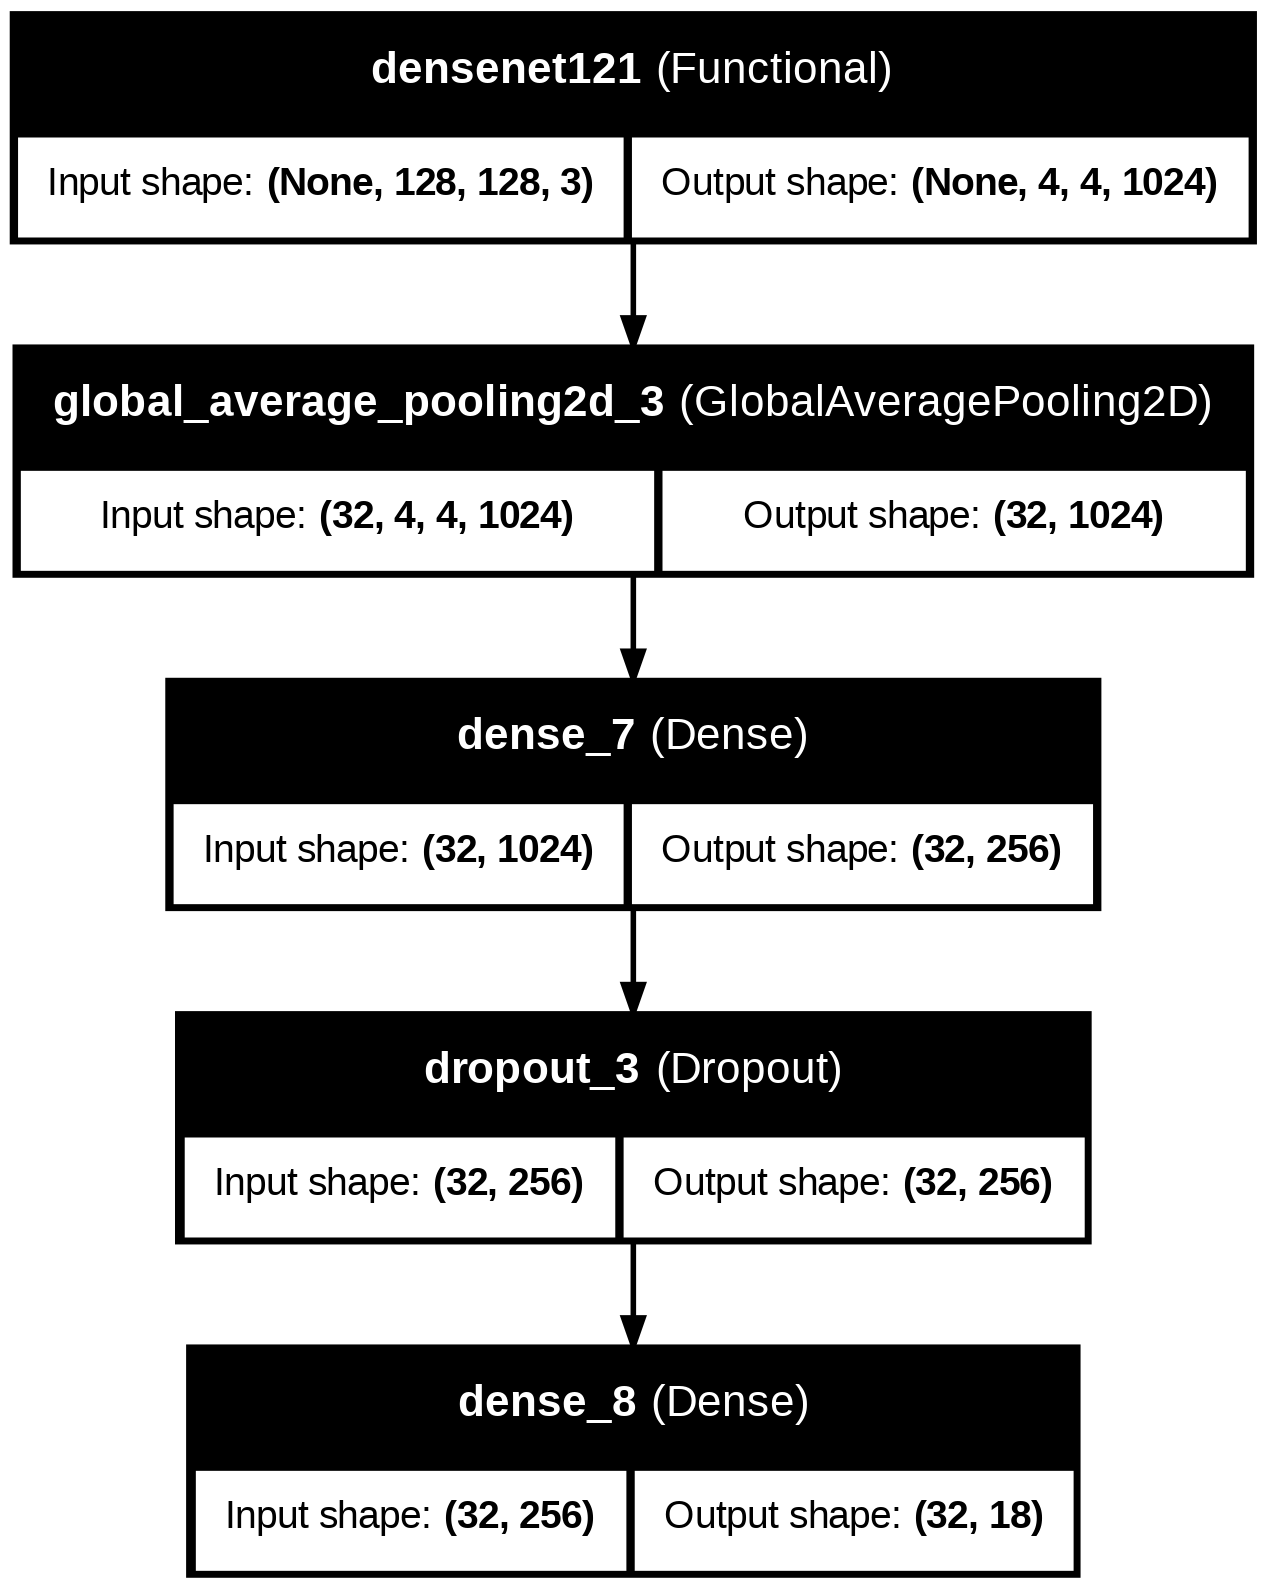

In [ ]:
# prompt: draw architecture of efficientnetv2 model

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


**10)draw precision and recall for above model**

123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step
Precision: 0.97
Recall: 0.98


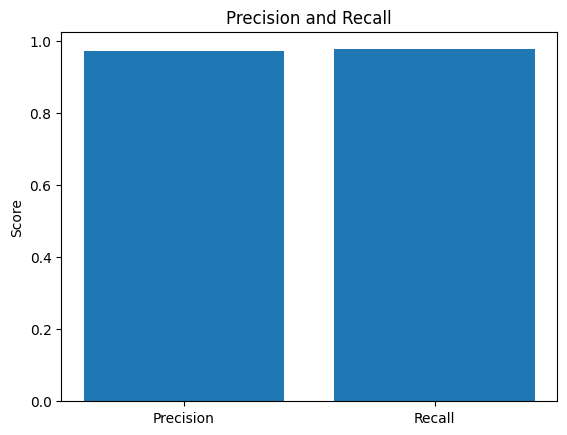

In [ ]:
# prompt: draw precision and recall for above model

import numpy as np
from sklearn.metrics import precision_score, recall_score

# Predict classes for test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision and recall
precision = precision_score(y_test, y_pred_classes, average='macro')
recall = recall_score(y_test, y_pred_classes, average='macro')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Plotting precision and recall
import matplotlib.pyplot as plt

plt.bar(['Precision', 'Recall'], [precision, recall])
plt.ylabel('Score')
plt.title('Precision and Recall')
plt.show()


**11)train the above using vgg16**

In [ ]:
# prompt: train the above using vgg16

from tensorflow.keras.applications import VGG16

# Load the VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the base model
model = Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # num_classes is from previous code

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Save the entire model to a HDF5 file
model.save("my_vgg16_model.h5")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.5083 - loss: 1.6643 - val_accuracy: 0.8254 - val_loss: 0.6138
Epoch 2/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.7930 - loss: 0.6738 - val_accuracy: 0.8850 - val_loss: 0.4154
Epoch 3/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8483 - loss: 0.4917 - val_accuracy: 0.9081 - val_loss: 0.3363
Epoch 4/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8784 - loss: 0.3970 - val_accuracy: 0.9094 - val_loss: 0.2969
Epoch 5/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8931 - loss: 0.3329 - val_accuracy: 0.9304 - val_loss: 0.2389
Epoch 6/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9104 - loss: 0.2862 - val_accuracy: 0.9339 - val_loss: 0.2293
Epoch 7/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9193 - loss: 0.2614 - val_accuracy: 0.9409 - val_loss: 0.2038
Epoch 8/10
489/489 ━━━━━━━━━━━━━━━━━━━━

Test Accuracy: 94.96%


**12)train inception v3 model**

In [ ]:
# prompt: train inception v3 model

from tensorflow.keras.applications import InceptionV3

# Load the InceptionV3 model without the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the base model
model = Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # num_classes is from previous code

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Save the entire model to a HDF5 file
model.save("my_model.keras.h5")


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.6066 - loss: 1.5974 - val_accuracy: 0.8579 - val_loss: 0.4659
Epoch 2/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8057 - loss: 0.6267 - val_accuracy: 0.8948 - val_loss: 0.3303
Epoch 3/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8360 - loss: 0.5172 - val_accuracy: 0.9068 - val_loss: 0.3006
Epoch 4/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8518 - loss: 0.4524 - val_accuracy: 0.9163 - val_loss: 0.2645
Epoch 5/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8662 - loss: 0.4039 - val_accuracy: 0.9178 - val_loss: 0.2528
Epoch 6/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8711 - loss: 0.3859 - val_accuracy: 0.9309 - val_loss: 0.2267
Epoch 7/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8813 - loss: 0.3472 - val_accuracy: 0.9283 - val_loss: 0.2193
Epoch 8/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 11

Test Accuracy: 94.21%


**13)train the model using rnn**

In [ ]:
# prompt: train the model using rnn

# Reshape the input data for RNN (samples, time steps, features)
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], X_train.shape[2], X_train.shape[3])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1], X_test.shape[2], X_test.shape[3])

# Define the RNN model
model = Sequential()
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'), input_shape=(1, 128, 128, 3)))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2))))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()))
model.add(tf.keras.layers.LSTM(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_encoded)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.3436 - loss: 9.1492 - val_accuracy: 0.8018 - val_loss: 0.6525
Epoch 2/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8696 - loss: 0.4449 - val_accuracy: 0.8996 - val_loss: 0.3317
Epoch 3/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9660 - loss: 0.1244 - val_accuracy: 0.9240 - val_loss: 0.2722
Epoch 4/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9862 - loss: 0.0554 - val_accuracy: 0.9209 - val_loss: 0.3152
Epoch 5/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9946 - loss: 0.0221 - val_accuracy: 0.8904 - val_loss: 0.4089
Epoch 6/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9918 - loss: 0.0286 - val_accuracy: 0.9168 - val_loss: 0.3587
Epoch 7/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9925 - loss: 0.0265 - val_accuracy: 0.9214 - val_loss: 0.3889
Epoch 8/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9961 - loss: 0.0146 - val_acc

**14)train the above model using densenet**

In [ ]:
# prompt: train the above model using densenet

from tensorflow.keras.applications import DenseNet121

# Load the DenseNet121 model without the top (fully connected) layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the base model
model = Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # num_classes is from previous code

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Save the entire model to a HDF5 file
model.save("my_densenet_model.h5")


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 51s 79ms/step - accuracy: 0.7307 - loss: 1.0078 - val_accuracy: 0.9483 - val_loss: 0.1677
Epoch 2/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9178 - loss: 0.2500 - val_accuracy: 0.9629 - val_loss: 0.1167
Epoch 3/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9383 - loss: 0.1837 - val_accuracy: 0.9695 - val_loss: 0.0900
Epoch 4/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9520 - loss: 0.1391 - val_accuracy: 0.9782 - val_loss: 0.0619
Epoch 5/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9672 - loss: 0.0999 - val_accuracy: 0.9793 - val_loss: 0.0651
Epoch 6/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9654 - loss: 0.0994 - val_accuracy: 0.9790 - val_loss: 0.0561
Epoch 7/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9687 - loss: 0.0881 - val_accuracy: 0.9823 - val_loss: 0.0476
Epoch 8/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 1

Test Accuracy: 98.49%


**15)Train the model using nasnet**

In [ ]:
# prompt: Train the model using nasnet

# Load the NASNetMobile model without the top (fully connected) layers
base_model = tf.keras.applications.NASNetMobile(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the base model
model = Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # num_classes is from previous code

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Save the entire model to a HDF5 file
model.save("my_nasnet_model.h5")


19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 57s 94ms/step - accuracy: 0.6680 - loss: 1.1783 - val_accuracy: 0.8989 - val_loss: 0.3359
Epoch 2/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.8685 - loss: 0.3963 - val_accuracy: 0.9214 - val_loss: 0.2469
Epoch 3/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9053 - loss: 0.2908 - val_accuracy: 0.9363 - val_loss: 0.1991
Epoch 4/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9250 - loss: 0.2322 - val_accuracy: 0.9514 - val_loss: 0.1553
Epoch 5/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9379 - loss: 0.1867 - val_accuracy: 0.9508 - val_loss: 0.1506
Epoch 6/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9513 - loss: 0.1513 - val_accuracy: 0.9580 - val_loss: 0.1353
Epoch 7/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9481 - loss: 0.1525 - val_accuracy: 0.9575 - val_loss: 0.1353
Epoch 8/10
489/489 ━━━━━━━━━━━━━━━━━━━━

Test Accuracy: 96.26%


**16)train the model using xception**

In [ ]:
# prompt: train the model using xception

# Load the Xception model without the top (fully connected) layers
base_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the base model
model = Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # num_classes is from previous code

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Save the entire model to a HDF5 file
model.save("my_xception_model.h5")


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.7110 - loss: 1.0009 - val_accuracy: 0.9130 - val_loss: 0.2893
Epoch 2/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8851 - loss: 0.3539 - val_accuracy: 0.9421 - val_loss: 0.1931
Epoch 3/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9158 - loss: 0.2591 - val_accuracy: 0.9421 - val_loss: 0.1880
Epoch 4/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9308 - loss: 0.2167 - val_accuracy: 0.9475 - val_loss: 0.1609
Epoch 5/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9424 - loss: 0.1726 - val_accuracy: 0.9544 - val_loss: 0.1469
Epoch 6/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9482 - loss: 0.1589 - val_accuracy: 0.9544 - val_loss: 0.1424
Epoch 7/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9539 - loss: 0.1422 - val_accuracy: 0.9631 - val_loss: 0.1196
Epoch 8/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 8s 1

Test Accuracy: 96.42%


**17)Train the model using Mobilenet**

In [8]:
# prompt: train the model using MobileNet to get high accuracy

# Load the MobileNetV2 model without the top (fully connected) layers
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False


# Create a new model on top of the base model
model = Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # num_classes is from previous code

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Save the entire model to a HDF5 file
model.save("my_mobilenet_model.h5")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.7783 - loss: 0.7580 - val_accuracy: 0.9601 - val_loss: 0.1228
Epoch 2/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9509 - loss: 0.1554 - val_accuracy: 0.9713 - val_loss: 0.0925
Epoch 3/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9657 - loss: 0.1020 - val_accuracy: 0.9795 - val_loss: 0.0653
Epoch 4/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9730 - loss: 0.0777 - val_accuracy: 0.9821 - val_loss: 0.0558
Epoch 5/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9787 - loss: 0.0652 - val_accuracy: 0.9831 - val_loss: 0.0537
Epoch 6/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9817 - loss: 0.0593 - val_accuracy: 0.9803 - val_loss: 0.0568
Epoch 7/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9792 - loss: 0.0600 - val_accuracy: 0.9823 - val_loss: 0.0595
Epoch 8/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms

Test Accuracy: 98.54%
